In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
imdb = keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

2.4.1
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


훈련 샘플 개수: 25000, 테스트 개수: 25000


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


In [3]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

1646592/1641221 [==============================] - 0s 0us/step
the
1


In [4]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


In [5]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [6]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


In [8]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [9]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 11s 257ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 2/20
30/30 [==============================] - 7s 241ms/step - loss: 0.6931 - accuracy: 0.5070 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 6s 201ms/step - loss: 0.6931 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 4/20
30/30 [==============================] - 3s 115ms/step - loss: 0.6928 - accuracy: 0.5203 - val_loss: 0.6928 - val_accuracy: 0.5043
Epoch 5/20
30/30 [==============================] - 3s 109ms/step - loss: 0.6916 - accuracy: 0.5247 - val_loss: 0.6920 - val_accuracy: 0.5074
Epoch 6/20
30/30 [==============================] - 3s 108ms/step - loss: 0.6870 - accuracy: 0.5335 - val_loss: 0.8065 - val_accuracy: 0.5134
Epoch 7/20
30/30 [==============================] - 3s 108ms/step - loss: 0.7222 - accuracy: 0.5142 - val_loss: 0.6889 - val_accuracy: 0.5099
Epoch

In [11]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 21s - loss: 0.6086 - accuracy: 0.7145
[0.6085729002952576, 0.7145199775695801]


In [12]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


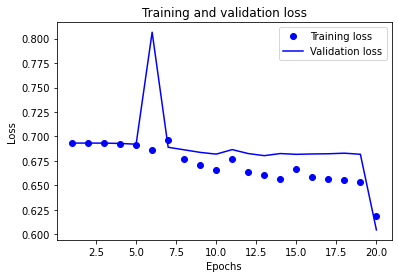

In [13]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

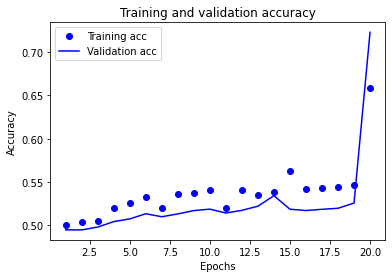

In [14]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [16]:
import os

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [17]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


array([-0.08697867, -0.15006796,  0.03060513,  0.08926633, -0.09601017,
       -0.14334927, -0.10718179, -0.12175739,  0.04064253,  0.06448346,
       -0.06780133,  0.05953778, -0.05997873,  0.141873  ,  0.1213082 ,
       -0.12904876], dtype=float32)

In [18]:
word_vectors.similar_by_word("love")

[('2006', 0.8884302973747253),
 ('tarzan', 0.8882225751876831),
 ('machines', 0.8659952282905579),
 ('disappear', 0.8633579611778259),
 ('universal', 0.8619470596313477),
 ('delightful', 0.8564751744270325),
 ("city's", 0.8536905646324158),
 ('seemed', 0.8533265590667725),
 ('spite', 0.849999189376831),
 ('crossing', 0.849051833152771)]

In [19]:
!ln -s ~/data/GoogleNews-vectors-negative300.bin.gz ~/aiffel/sentiment_classification/data

In [20]:
from gensim.models import KeyedVectors
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [21]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [22]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 (변경가능한 하이퍼파라미터)

# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 114, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [23]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 18s 475ms/step - loss: 0.7005 - accuracy: 0.5043 - val_loss: 0.6772 - val_accuracy: 0.5994
Epoch 2/20
30/30 [==============================] - 11s 378ms/step - loss: 0.6621 - accuracy: 0.6396 - val_loss: 0.6207 - val_accuracy: 0.6739
Epoch 3/20
30/30 [==============================] - 11s 365ms/step - loss: 0.5633 - accuracy: 0.7489 - val_loss: 0.4626 - val_accuracy: 0.7769
Epoch 4/20
30/30 [==============================] - 11s 374ms/step - loss: 0.3738 - accuracy: 0.8391 - val_loss: 0.3186 - val_accuracy: 0.8650
Epoch 5/20
30/30 [==============================] - 11s 380ms/step - loss: 0.2490 - accuracy: 0.9048 - val_loss: 0.2905 - val_accuracy: 0.8775
Epoch 6/20
30/30 [==============================] - 11s 373ms/step - loss: 0.1780 - accuracy: 0.9401 - val_loss: 0.2853 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 11s 374ms/step - loss: 0.1312 - accuracy: 0.9614 - val_loss: 0.2965 - val_accuracy: 0.8798

In [24]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 8s - loss: 0.5923 - accuracy: 0.8694
[0.5922532677650452, 0.8693600296974182]


## 프로젝트: 네이버 영화리뷰 감성분석
-----

### 1. Naver sentiment movie corpus 불러오기

In [6]:
!ln -s ~/data/*.txt ~/aiffel/sentiment_classification/data

ln: failed to create symbolic link '/aiffel/aiffel/sentiment_classification/data/ratings_test.txt': File exists
ln: failed to create symbolic link '/aiffel/aiffel/sentiment_classification/data/ratings_train.txt': File exists


In [26]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from tensorflow.python.platform import tf_logging as logging

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

print(train_data[:5])

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


### 2. 데이터로더 구성

* 데이터의 중복제거
* NaN 결측치 제거
* 한국어 토크나이저로 토큰화
* 불용어(Stopwords) 제거
* 사전(word_to_dictionary) 구성
* 텍스트 스트링을 사전 인덱스 스트링으로 변환
* X_train, y_train, X_test, y_test, word_to_index 리턴

In [33]:
from konlpy.tag import Mecab
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '']
emotic_words = ['ㅎ', 'ㅋ' ,'ㅠ', 'ㅜ' ,'ㅡ', 'ㅉ']
#emoticon_dictionary = {'^^':'웃음', '♥':'좋음'}
num_words = 10000


def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]


def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]


# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외


def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]


def Tokenizer(train_data):
    tokenizer = Okt()
    tokens = []
    for sentence in train_data['document']:
        for single_word in emotic_words:
            if sentence.find(single_word) > -1:
                sentence = sentence.replace(single_word, '')
                sentence = sentence+single_word
        pre_tokens = tokenizer.morphs(u''+sentence)
        tokens += [token for token in pre_tokens 
                   if token not in stopwords 
                   if not token.isdigit()  
                   if token.find('.') == -1
                   if token.find('!') == -1
                   if token.find('?') == -1
                   if token.find(';') == -1
                   if token.find(':') == -1
                   if token.find(')') == -1
                   if token.find('(') == -1
                   if token.find('-') == -1
                   if token.find(',') == -1
                   if token.find('%') == -1
                   if token.find('/') == -1
                   if token.find('@') == -1
                   if token.find('"') == -1
                   if token.find("'") == -1
                   if token.find("~") == -1
                   if token.find("''") == -1
                   if token.find('""') == -1
                   if token.find('`') == -1
                   if token.find('^') == -1
                   if token.find('>') == -1
                  ]
    tokens = np.array(tokens)
    tokens = np.unique(tokens)
    return tokens
                

def get_index_to_word(tokens):
    index_to_word = {0:'<PAD>', 1:'<BOS>', 2:'<UNK>'}
    for idx, token in enumerate(tokens):
        index_to_word[idx+len(index_to_word)] = token  
    return index_to_word
        
    
def load_data(train_data, test_data, num_words=num_words):
    # train_data 중복제거 및 NaN제거
    print('최초크기:',train_data.shape)
    train_data = train_data.drop_duplicates()
    print('중복제거 후 크기:',train_data.shape)
    train_data = train_data.dropna()
    print('NaN제거 후 크기:', train_data.shape)
    tokens = Tokenizer(train_data)
    index_to_word = get_index_to_word(tokens)
    list(index_to_word.items())[:10]
    word_to_index={word:index for index, word in index_to_word.items()}
    raw_inputs = np.array(get_encoded_sentences(train_data, word_to_index))
    raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='pre',
                                                       maxlen=5) 
    return word_to_index
    #return X_train, y_train, X_test, y_test, word_to_index 
       

   
    
#X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [34]:
dictionary = load_data(train_data, test_data)

최초크기: (150000, 3)
중복제거 후 크기: (150000, 3)
NaN제거 후 크기: (149995, 3)


In [35]:
list(dictionary.items())[:100]

[('<PAD>', 0),
 ('<BOS>', 1),
 ('<UNK>', 2),
 ('#', 3),
 ('##들', 5),
 ('##잘봤어요', 7),
 ('#디워2', 9),
 ('#셀프디스', 11),
 ('$', 13),
 ('$$', 15),
 ('$2', 17),
 ('&', 19),
 ('&#', 21),
 ('&&', 23),
 ('*', 25),
 ('**', 27),
 ('***', 29),
 ('****', 31),
 ('************', 33),
 ('*_*', 35),
 ('+', 37),
 ('++', 39),
 ('++++', 41),
 ('++++++', 43),
 ('+_+', 45),
 ('+_=', 47),
 ('007년', 49),
 ('007시', 51),
 ('00년', 53),
 ('00시', 55),
 ('01년', 57),
 ('02년', 59),
 ('03년', 61),
 ('03분', 63),
 ('04년', 65),
 ('04월', 67),
 ('05년', 69),
 ('06년', 71),
 ('06월', 73),
 ('07년', 75),
 ('08년', 77),
 ('08일', 79),
 ('09년', 81),
 ('0원', 83),
 ('1000000000만', 85),
 ('10000원', 87),
 ('1000년', 89),
 ('1000만', 91),
 ('1000억', 93),
 ('1000억원', 95),
 ('1000원', 97),
 ('100년', 99),
 ('100만', 101),
 ('100만분', 103),
 ('100만원', 105),
 ('100분', 107),
 ('100억', 109),
 ('100원', 111),
 ('100일', 113),
 ('100회', 115),
 ('101분', 117),
 ('102분', 119),
 ('102회', 121),
 ('103분', 123),
 ('105분', 125),
 ('107분', 127),
 ('1083년', 129),
 (